In [25]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [27]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [29]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [71]:
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


In [32]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [33]:

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=224//32, #steps_per_epoch=length_of_training_set/batch_size
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 45s 6s/step - loss: 1.6927 - accuracy: 0.5692 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 37s 5s/step - loss: 0.6968 - accuracy: 0.4953 - val_loss: 0.6798 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 35s 5s/step - loss: 0.6275 - accuracy: 0.7496 - val_loss: 0.5118 - val_accuracy: 0.9167
Epoch 4/10
7/7 [==============================] - 37s 5s/step - loss: 0.4394 - accuracy: 0.8380 - val_loss: 0.3088 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 0.3533 - accuracy: 0.8624 - val_loss: 0.1863 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 40s 6s/step - loss: 0.2743 - accuracy: 0.8789 - val_loss: 0.1461 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 40s 6s/step - loss: 0.2642 - accuracy: 0.8783 - val_loss: 0.0764 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [34]:
model.save("model_adv.h5")

In [35]:
model.evaluate_generator(train_generator)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.11930572986602783, 0.9598214030265808]

In [36]:
model.evaluate_generator(validation_generator)

[0.08090820163488388, 0.9833333492279053]

In [62]:
model = load_model('model_adv.h5')

In [38]:
import os

In [63]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [40]:
y_actual = []
y_test = []

In [41]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)


In [42]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [43]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
cm = confusion_matrix(y_actual, y_test)

<AxesSubplot:>

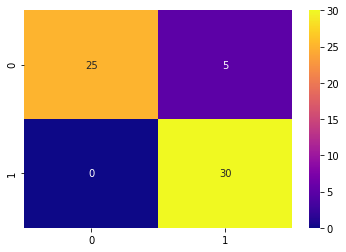

In [46]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [64]:
import numpy as np
from keras.preprocessing import image

In [79]:
dic = {0:'Covid', 1:'Normal'}
test_image = image.load_img('./ManualTest/cov.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)


if result==0:
    print("The patient is Covid Positive")
else:
    print("The patient is Normal")


The patient is Covid Positive
